In [1]:
import os 
from locscale.include.emmer.pdb.pdb_utils import get_bfactors, add_atomic_bfactors, shift_bfactors_by_probability
from locscale.preprocessing.headers import average_atomic_bfactors_window

pdb_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_3061/model_based/processing_files/5a63_shifted_servalcat_refined.pdb"

averaged_st = average_atomic_bfactors_window(pdb_path, window_radius=25)
averaged_st.write_pdb("5a63_shifted_servalcat_refined_averaged_25A.pdb")


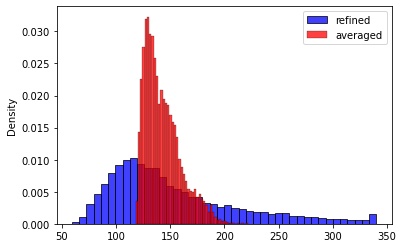

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

bfactors_refined = get_bfactors(pdb_path)
bfactors_averaged = get_bfactors(averaged_st)

sns.histplot(bfactors_refined, color="blue", label="refined", stat="density")
sns.histplot(bfactors_averaged, color="red", label="averaged", stat="density")

plt.legend()


In [4]:
from locscale.include.emmer.pdb.pdb_utils import shift_bfactors_by_probability

shifted_pdb_structure = shift_bfactors_by_probability(averaged_st)
shifted_pdb_structure[0].write_pdb("5a63_shifted_servalcat_refined_averaged_25A_shifted.pdb")

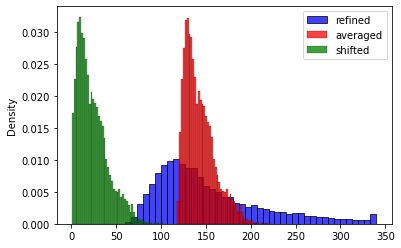

In [6]:
shifted_bfactors = get_bfactors(shifted_pdb_structure[0])

sns.histplot(bfactors_refined, color="blue", label="refined", stat="density")
sns.histplot(bfactors_averaged, color="red", label="averaged", stat="density")
sns.histplot(shifted_bfactors, color="green", label="shifted", stat="density")

plt.legend()

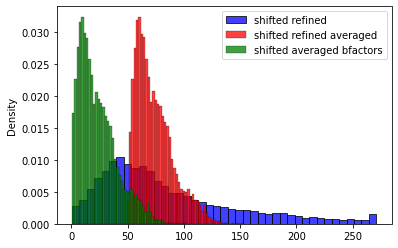

In [7]:
shifted_refined_structure = shift_bfactors_by_probability(pdb_path)
shifted_refined_averaged_structure = average_atomic_bfactors_window(shifted_refined_structure[0], window_radius=25)

shifted_refined_bfactors = get_bfactors(shifted_refined_structure[0])
shifted_refined_averaged_bfactor = get_bfactors(shifted_refined_averaged_structure)

sns.histplot(shifted_refined_bfactors, color="blue", label="shifted refined", stat="density")
sns.histplot(shifted_refined_averaged_bfactor, color="red", label="shifted refined averaged", stat="density")
sns.histplot(shifted_bfactors, color="green", label="shifted averaged bfactors", stat="density")

plt.legend()

In [9]:
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc
from locscale.include.emmer.ndimage.map_tools import sharpen_maps
from locscale.include.emmer.ndimage.filter import low_pass_filter

unsharpened_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/EMD_3061_unfiltered.mrc"

emmap, apix = load_map(unsharpened_map_path)

emmap_sharpened = sharpen_maps(emmap, apix, 109)

filtered_map = low_pass_filter(emmap_sharpened, 3.4, apix)

save_as_mrc(emmap_sharpened, "EMD_3061_unfiltered_sharpened_109A2.mrc", apix)
save_as_mrc(filtered_map, "EMD_3061_unfiltered_sharpened_109A2_filtered.mrc", apix)



/home/abharadwaj1/miniconda3/envs/locscale_dev/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
